<a href="https://colab.research.google.com/github/Julianfried/Diplomatura-en-IA-Instituto-Humai/blob/main/Matematicas%20para%20IA/ejercicios_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaIA/6_Probabilidad/ejercicios/ejercicios.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Ejercicios

## Definiciones básicas

### Ejercicios de cuentas
1. Sea $\Omega$ el conjunto de cartas de un mazo de cartas españolas (ver primer párrafo [acá](https://es.wikipedia.org/wiki/Baraja_espa%C3%B1ola) en caso de duda). De ser útil, podemos ponerle un número a cada carta, de forma tal que Tomado como espacio muestral, esto indica que nuestro experimento consiste en tomar una carta del mazo. Sea $p$ la medida de probabilidad que le asigna probabilidad $1/48$ a cada carta (consistente con mezclar bien el mazo cada vez que se va a tomar una carta). Calcular la probabilidad de los siguientes eventos:
   1. El "palo" de la carta revelada es "copa".
   2. La carta revelada es una "figura" (un $10$, un $11$ o un $12$).
   3. El "palo" de la carta revelada es "copa" o la carta revelada es una figura.


In [1]:
omega = 48
n_cartas_copa = 12
prob_copa = n_cartas_copa/omega
print("Respuesta 1:", prob_copa)

n_figuras = 4*3
prob_figura = n_figuras/omega
print("Respuesta 2:", prob_figura)

n_figura_copas = 3
prob_figura_y_copa = n_figura_copas/omega
prob_figura_o_copa = prob_figura + prob_copa - prob_figura_y_copa
print("Respuesta 3",prob_figura_o_copa)

Respuesta 1: 0.25
Respuesta 2: 0.25
Respuesta 3 0.4375


2. Ahora tengo dos mazos de cartas españolas. ¿Cuál es la probabilidad de que, al sacar una carta de cada uno, al menos una de las dos sea el $1$ de espadas?
   * Ayuda: puede servir escribir el espacio muestral como $\Omega = \{(a, b) : 1 \leq a, b \leq 48\}$. Luego el evento por el que nos preguntamos es $A = \{(a, b) : a \text{ es el 1e ó } b \text{ es el 1e}\}$.

In [3]:
omega = 48*48

n_A = 1 * 47 + 1*1 + 47*1 #elementos en A
prob_A = n_A / omega
print("Respuesta",prob_A)

Respuesta 0.04123263888888889


3. Ahora tengo un solo mazo de cartas españolas. ¿Cuál es la probabilidad de que, al sacar dos cartas, alguna de las dos sea el $1$ de espadas?
   * Ayuda: puede servir escribir el espacio muestral como $\Omega = \{(a, b) : 1 \leq a, b \leq 48\ \text{ y además } a \neq b\}$. El evento por el que nos preguntamos es el mismo $A$ de antes.

In [9]:
omega = 48*47
n_A =  1 * 47 + 47 * 1
prob_A = n_A/omega
print("Respuesta",prob_A)

Respuesta 0.041666666666666664


## Distribuciones de probabilidad

7. Recordar la función de Python `generar_bitmap_aleatorio` de la clase. ¿Cuál es la probabilidad de que un bitmap aleatorio de $N \times N$ tenga $x$ píxeles blancos? ($x$ puede tomar valores $0, 1, 2, 3, \dots, N \times N$). Responder primero para $N = 10$ mediante una simulación de Monte Carlo (usando la función `generar_bitmap_aleatorio`), y luego dar una respuesta general para cualquier valor posible de $N$ usando la distribución binomial.




In [11]:
from scipy.stats import binom

def respuesta(k,N):
  prob = binom(N**2,0.5).pmf(k)
  print("La probabilidad de que en un bitmap aleatorios de NxN haya k píxeles blancos es ", prob)

respuesta(13, 10)
respuesta(200, 20)
respuesta(230, 20)

La probabilidad de que en un bitmap aleatorios de NxN haya k píxeles blancos es  5.609228993004059e-15
La probabilidad de que en un bitmap aleatorios de NxN haya k píxeles blancos es  0.03986930196379292
La probabilidad de que en un bitmap aleatorios de NxN haya k píxeles blancos es  0.00044040401117185964


8. (Sin respuesta) Repetir los gráficos realizados en la sección "Más distribuciones de probabilidad", comparando un histograma de muestras con el gráfico de la distribución teórica, pero reemplazando la distribución binomial por la [distribución de Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson), que depende de un único parámetro $\mu > 0$ ("mu") y está implementada en Python como `scipy.stats.poisson`.


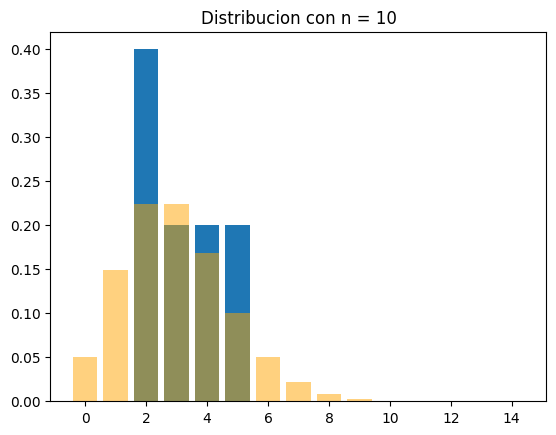

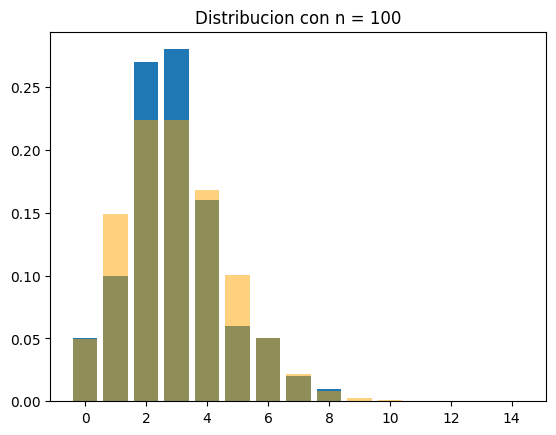

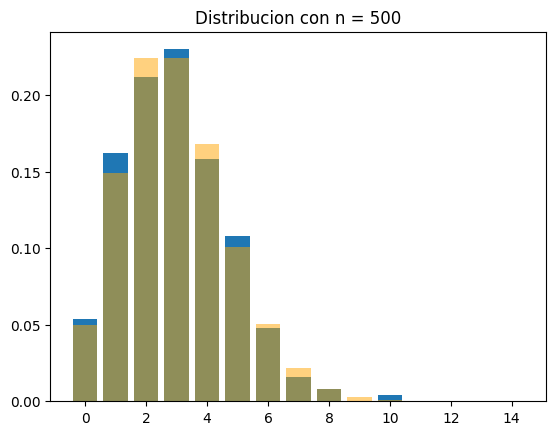

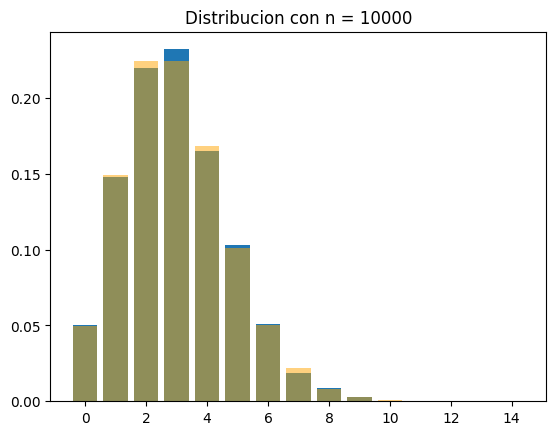

In [16]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

def graficar_poisson(mu, **kwargs):
  xs = np.arange(0, mu*5)
  poisson_mu = poisson(mu)
  ys = poisson_mu.pmf(xs)
  plt.bar(xs, ys, **kwargs)

def realizar_histograma(muestras, normalizado=True, **kwargs):
  valores_posible = np.arange(0, max(muestras)+1)
  conteos = np.bincount(muestras, minlength = len(valores_posible))
  if normalizado:
    conteos = conteos / len(muestras)
  plt.bar(valores_posible, conteos, **kwargs)

mu = 3

for n_samples in [10, 100, 500, 10000]:
  # Realizar el sampleo
  samples = poisson.rvs(mu, size=n_samples)

  plt.figure()
  plt.title(f'Distribucion con n = {n_samples}')
  realizar_histograma(samples)
  graficar_poisson(mu, color='orange', alpha=0.5)

9. (Sin respuesta) No todas las distribuciones de probabilidad tienen nombre. Por ejemplo, cuando sumamos los números de dos tiradas de dados, obtuvimos una variable aleatoria cuya distribución de probabilidad no tiene un nombre particular. La podemos llamar "suma de dos uniformes entre $1$ y $6$". Una forma de inventar nuevas distribuciones que quizá nadie haya nombrado aún es justamente empezar con una distribución conocida y aplicarle operaciones. Averigüen, haciendo Monte Carlo, qué pinta tienen las distribuciones que se obtienen de agarrar $X_1, X_2 \sim U(1,\dots,6)$ y multiplicarlas. ¿Y si hacen $X_1^{X_2}$? La imaginación es el límite.


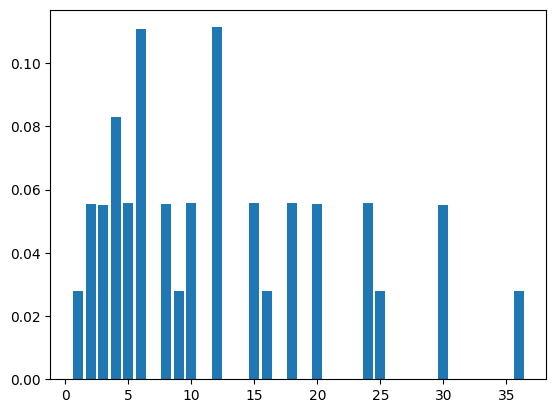

<BarContainer object of 28 artists>

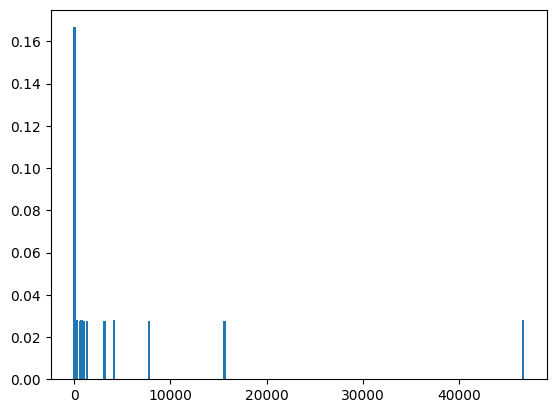

In [17]:
n_samples = 1000000
valores_experimentales = np.random.randint(1, 7, size=(n_samples, 2))

x_mult = np.prod(valores_experimentales, axis=1)
valores_posibles = np.arange(1, 6 * 6 + 1)
# Removemos el 0 utilizando [1:]
apariciones = np.bincount(x_mult)[1:]
fracciones = apariciones / n_samples
plt.bar(valores_posibles, fracciones)
plt.show()

# Exponencial
x1 = valores_experimentales[:, 0]
x2 = valores_experimentales[:, 1]
x_exp = np.power(x1, x2)

valores_obtenidos, apariciones = np.unique(x_exp, return_counts=True)
fracciones = apariciones / n_samples
plt.bar(valores_obtenidos, fracciones, width=250)

11.  En el ejemplo de los dados, sea $E$ el evento "la suma dio $7$" y sea $V$ el evento "el dado A es un $2$". ¿Son eventos dependientes o independientes?


In [ ]:
p_suma7 = 6/36 # = 1/6
p_Aes2 = 1/6
p_suma7_y_Aes2 = 1/36 # solo un caso posible, el (2, 5)

p_suma7_dado_Aes2 = p_suma7_y_Aes2 / p_Aes2
print(p_suma7_dado_Aes2)

#

La probabilidad condicional $p(E|V)$ nos da $1/6$, que es lo mismo que $p(E)$. Por lo tanto estos dos eventos son independientes.
